In [2]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [7]:
print(pca.explained_variance_ratio_)

[0.84248607 0.14631839]


In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [10]:
print(X2D[:5])
print(x_reduced[:5])

[[ 1.26203346  0.42067648]
 [-0.08001485 -0.35272239]
 [ 1.17545763  0.36085729]
 [ 0.89305601 -0.30862856]
 [ 0.73016287 -0.25404049]]
[[ 1.26203346  0.42067648]
 [-0.08001485 -0.35272239]
 [ 1.17545763  0.36085729]
 [ 0.89305601 -0.30862856]
 [ 0.73016287 -0.25404049]]


pca = PCA(n_components = 154)
X_mnist_reduced = pca.fit_transform(X_mnist)
X_mnist_recovered = pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_mnist_reduced = inc_pca.transform(X_mnist)

In [11]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

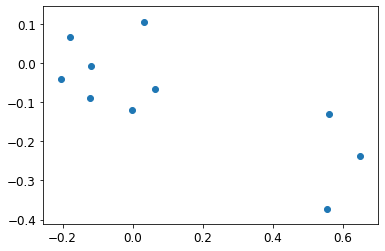

In [14]:
plt.scatter(X_reduced[:10, 0], X_reduced[:10, 1])
plt.show()

# Exercises

1) We want to visualise the data in 2 or 3 dimensions, or we want to speed up training considerably when there are very large number of features. Drawbacks include a slight loss of information, and also time taken to reduce vary between dimensionality reduction techniques.

2) This is the problem that high-dimensional datasets are hard to visualise and to understand the behaviours of the data in a sparse hyperspace. More dimensions also increases the risk of overfitting the training data.

3) Yes, we can use the `inverse_transform()` method to revert back to the original data, but there will be some loss of quality or information.

4) We can do it, but it may be better to use kPCA or LLE to capture nonlinearity such as manifolds in the data.

5) It depends on the dataset, but we can estimate about `m / 5` so roughly 200 dimensions.

6) Vanilla PCA: We can use this when the dataset can fit in memory and is not highly nonlinear

Incremental PCA: We use this to use out-of-core for training sets too large to fit in memory to as part of online learning systems

Randomised PCA: We use this to speed up the process of dimensionality reduction by approximating the first d PCs

Kernel PCA: When we have complex nonlinear relationships

7) We can compare the reconstruction error or use a supervised method by training a classifier to check the performance when using the reduced dimensions training data versus the full data.

8) Yes, If we have complex nonlinearity, we can use kPCA or LLE to reduce dimensions with 95% explained variance, and then use t-SNE to visualise the dataset.

## 9)

In [15]:
# load MNIST
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [16]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [39]:
import time
start = time.time()
forest_clf.fit(X_train, y_train)
end = time.time()
print('Time:', round(end - start, 3))

Time: 8.028


In [40]:
print(forest_clf.score(X_test, y_test))

0.9492


In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [43]:
forest_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
start = time.time()
forest_clf2.fit(X_train_reduced, y_train)
end = time.time()
print('Time:', round(end - start, 3))

Time: 22.898


In [44]:
print(forest_clf2.score(X_test_reduced, y_test))

0.9009


In [45]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print('Time {:.3f}s'.format(t1 - t0))

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Time 42.839s


In [46]:
log_clf.score(X_test, y_test)

0.9255

In [47]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print('Time {:.3f}s'.format(t1 - t0))

Time 9.316s


C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [49]:
log_clf2.score(X_test_reduced, y_test)

0.9201

Use PCA then t-SNE in a pipeline

`pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])`